__Задача 1__

О непрерывной равномерно распределенной случайной величине B известно, что ее дисперсия равна 0.2. Можно ли найти правую границу величины B и ее среднее значение зная, что левая граница равна 0.5? Если да, найдите ее.

Исходя из формулы дисперсии равномерного распределения D(X) = ((b - a)**2) / 12 находим неизвестную правую границу: b ** 2 - b - 6.25 = 0

In [1]:
import math

discr = (-1) ** 2 - 4 * 1 * (-6.25)
if discr > 0:
    b1 = (1 + math.sqrt(discr)) / (2 * 1)
    b2 = (1 - math.sqrt(discr)) / (2 * 1)
    print(f'b1 = {b1}, b2 = {b2}')
elif discr == 0:
    b = 1 / (2 * 1)
    print(f'b = {b}')
else:
    print('Нет корней')

b1 = 3.0495097567963922, b2 = -2.0495097567963922


 Так как левая граница (а = 0.5) > 0, то и правая граница должна быть > 0. Следовательно, правая граница b = b1

Математическое ожидание равномерно распределенной случайной величины M = (a + b) / 2

In [2]:
a = 0.5
b = b1
M_x = (a + b) / 2
M_x

1.7747548783981961

__Задача 2__

Рост взрослого населения города X имеет нормальное распределение, причем, средний рост равен 174 см, а среднее квадратическое отклонение равно 8 см. посчитайте, какова вероятность того, что случайным образом выбранный взрослый человек имеет рост:
1. больше 182 см?
2. больше 190 см?
3. от 166 см до 190 см?
4. от 166 см до 182 см?
5. от 158 см до 190 см?
6. не выше 150 см или не ниже 190 см?
7. не выше 150 см или не ниже 198 см?
8. ниже 166 см?

In [3]:
from scipy import stats
import warnings
import statistics as sts
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

 Согласно правилу 3-х сигм: на отрезке от  −σ  до  +σ  расположено около 68 % наблюдений, от  −2σ  до  +2σ  — 95.4 %, от  −3σ  до  +3σ  — 99.72 %. 

Найдём разброс роста от −σ до +σ:

In [15]:
height_mean = 174
sigma = 8
a = (-1) * sigma 
b = sigma 
sigma_1 = f'[{a + height_mean} - {b + height_mean}]'
sigma_1

'[166 - 182]'

Найдём разброс роста от −2σ до +2σ:

In [16]:
sigma_2 = f'[{2 * a + height_mean} - {2 * b + height_mean}]'
sigma_2

'[158 - 190]'

Найдём разброс роста от −2σ до +2σ:

In [17]:
sigma_3 = f'[{3 * a + height_mean} - {3 * b + height_mean}]'
sigma_3

'[150 - 198]'

1. больше 182 см? = (100% - 68% {т.к. рост находится за пределами отрезка от −σ до +σ}) / 2 {выбираем одну из сторон вне отрезка [-σ;+σ], а именно правую} = __16.0%__
2. больше 190 см? = (100% - 95.4% {т.к. рост находится за пределами отрезка от −2σ до +2σ}) / 2 {выбираем одну из сторон вне отрезка [-2σ;+2σ], а именно правую} = __2.3%__
3. от 166 см до 190 см? = (68% {т.к. отправная точка роста находится внутри  отрезка от −σ до +σ}) + (95.4% - 68%)  / 2 {расчитываем вероятность нахождения на одной из сторон вне отрезка [-σ;+σ], а именно правой} = __81.7%__
4. от 166 см до 182 см? = __68.0%__{т.к. интервал роста находится внутри  отрезка от −σ до +σ}
5. от 158 см до 190 см? = (68% + (95.4% - 68%)  / 2 {т.к. отправная точка роста находится внутри отрезка от −2σ до +2σ и слева от  отрезка [-σ;+σ]}) + (95.4% - 68%)  / 2 {расчитываем вероятность нахождения на одной из сторон вне отрезка [-σ;+σ], а именно правой} = __95.4%__
6. не выше 150 см или не ниже 190 см? = (100% - 99.72%)  / 2 {т.к. отправная точка роста находится внутри отрезка [-3σ;+3σ] и слева от  отрезка [-2σ;+2σ]}) + (100% - 95.4%)  / 2 {расчитываем вероятность нахождения роста справа от отрезка [-σ;+σ]} = __2.44%__
7. не выше 150 см или не ниже 198 см? = (100% - 99.72%)  / 2 {т.к. отправная точка роста находится внутри отрезка [-3σ;+3σ] и слева от  отрезка [-2σ;+2σ]}) + (100% - 99.72%)  / 2 {расчитываем вероятность нахождения роста справа от отрезка [-2σ;+2σ]} = __0.28%__
8. ниже 166 см? = (100% - 68% {т.к. рост находится за пределами отрезка от −σ до +σ}) / 2 {выбираем одну из сторон вне отрезка [-σ;+σ], а именно левую} = __16.0%__

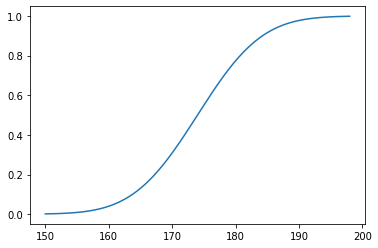

In [31]:
ox = np.linspace(150, 198, 1000)
oy = stats.norm.cdf(ox, loc=174, scale=8)
plt.plot(ox, oy)

In [32]:
norm = stats.norm(loc=174, scale=8)

In [41]:
print(f'Вероятность иметь рост больше 182 см = {1 - norm.cdf(182)}')

Вероятность иметь рост больше 182 см = 0.15865525393145707


In [42]:
print(f'Вероятность иметь рост больше 190 см = {1 - norm.cdf(190)}')

Вероятность иметь рост больше 190 см = 0.02275013194817921


In [43]:
print(f'Вероятность иметь рост от 166 см до 190 см = {norm.cdf(190) - norm.cdf(166)}')

Вероятность иметь рост от 166 см до 190 см = 0.8185946141203637


In [44]:
print(f'Вероятность иметь рост от 166 см до 182 см = {norm.cdf(182) - norm.cdf(166)}')

Вероятность иметь рост от 166 см до 182 см = 0.6826894921370859


In [45]:
print(f'Вероятность иметь рост от 158 см до 190 см = {norm.cdf(190) - norm.cdf(158)}')

Вероятность иметь рост от 158 см до 190 см = 0.9544997361036416


In [48]:
print(f'Вероятность иметь рост не выше 150 см или не ниже 190 см = {norm.cdf(150) + 1 - norm.cdf(190)}')

Вероятность иметь рост не выше 150 см или не ниже 190 см = 0.0241000299798092


In [49]:
print(f'Вероятность иметь рост не выше 150 см или не ниже 190 см = {norm.cdf(150) + 1 - norm.cdf(198)}')

Вероятность иметь рост не выше 150 см или не ниже 190 см = 0.002699796063260096


In [47]:
print(f'Вероятность иметь рост не выше 166 см = {norm.cdf(166)}')

Вероятность иметь рост не выше 166 см = 0.15865525393145707


__Задача 3__ (Дополнительно)

Коробки с шоколадом упаковываются автоматически. Их средняя масса равна 1.06 кг. Известно, что 5% коробок имеют массу, меньшую 1 кг. Найдите: а) среднее квадратическое отклонение массы коробки, б) процент коробок, имеющих массу больше 1.1 кг.

Подсказка. 1. Можно считать, что распределение массы коробки нормальное. 2. Найдите такое значение scale, для которого значение cdf(x=1, loc=1.06, scale=scale) близко к 0.05. Точности 0.0001 будет достаточно.

а) Сначала найдём среднее квадратическое отклонение массы коробки путём перебора с использованием цикла while:

In [102]:
scale = 0.0001
norm1 = stats.norm(loc=1.06, scale=scale)
while norm1.cdf(1) < 0.05:
    scale += 0.0001
    norm1 = stats.norm(loc=1.06, scale=scale)
    norm1.cdf(1)
print(scale)

0.03650000000000002


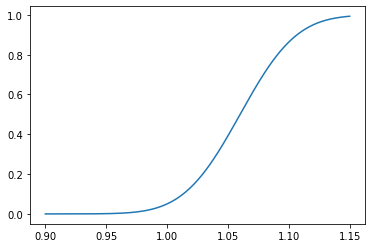

In [103]:
ox = np.linspace(0.90, 1.15, 1000)
oy = stats.norm.cdf(ox, loc=1.06, scale=0.0365)
plt.plot(ox, oy)

In [104]:
norm1 = stats.norm(loc=1.06, scale=0.0365)
norm1.cdf(1)

0.05010508110149495

б) Найдём процент коробок, имеющих массу больше 1.1 кг:

In [106]:
print(f'Процент коробок, имеющих массу больше 1.1 кг = {100 * (1 - norm1.cdf(1.1))}')

Процент коробок, имеющих массу больше 1.1 кг = 13.656336797447754
